## Title
MCMC from Scratch for Neural Networks

## Description :
The aim of this exercise is to perform Monte Carlo Markov Chain (MCMC) from scratch for a simple neural network.

On completing the exercise you should be able to see a distribution similar to the following. One for each network parameter:

<img src="../fig/fig2.png" style="width: 500px;">

## Instructions:
- Read the data file backprop.csv and set the predictor and response variables.
- Create 3 lists to store the weights and bias (i.e. the network parameters) and initialize the parameter values.
- Define a function `get_log_prior` to compute the prior value given the network parameter values. 
- Compute the likelihood, prior and posterior for the initial parameter values.
- For a selected number of sampling "epochs":
    - Compute new weights and bias.
    - Compute the corresponding likelihood, prior and posterior.
    - Compute the exponential ratio of the current and previous posterior.
    - Based on the ratio, select or reject the new parameter values.
- Choose a burn rate.
- Plot the histogram of the weights and bias.

## Hints: 

<a href="https://numpy.org/doc/stable/reference/generated/numpy.log.html" target="_blank">np.log()</a> Computes the natural logarithm, element-wise.

<a href="https://numpy.org/doc/stable/reference/generated/numpy.exp.html?highlight=exp#numpy.exp" target="_blank">np.exp()</a> Calculates the exponential of all elements in the input array.

<a href="https://www.tensorflow.org/api_docs/python/tf/reshape" target="_blank">tf.reshape()</a> Reshapes a tensor.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html?highlight=linear%20regression#sklearn.linear_model.LinearRegression.fit" target="_blank">.fit()</a> Fits the linear model to the data.

<a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html?highlight=random%20normal#numpy.random.normal" target="_blank">np.random.normal()</a> Draw random samples from a normal (Gaussian) distribution.

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html" target="_blank">norm.pdf()</a> A normal continuous random variable.

<a href="https://numpy.org/doc/stable/reference/generated/numpy.sum.html?highlight=sum" target="_blank">np.sum()</a> Sum of array elements over a given axis.

<a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html?highlight=random%20uniform" target="_blank">np.random.uniform()</a> Draw samples from a uniform distribution.

<a href="https://numpy.org/doc/stable/reference/generated/numpy.zeros.html" target="_blank">np.zeros()</a> Return a new array of given shape and type, filled with zeros.

In [239]:
# Import necessary libraries
import matplotlib.pyplot as plt
from scipy.stats import norm
from random import sample
import tensorflow as tf
tf.random.set_seed(42)
import pandas as pd
import numpy as np
%matplotlib inline
dtype = 'float32'


In [240]:
# Read the data file "backprop.csv"
df = pd.read_csv("../data/backprop.csv")

# Take a quick look at the data
df.head()

,x,y
0,-5.00000,0.006693
1,-4.98999,0.006760
2,-4.97998,0.006827
3,-4.96997,0.006895
4,-4.95996,0.006964


In [241]:
# Get the predictor and response data
X_data = df["x"]
y_data = df["y"]

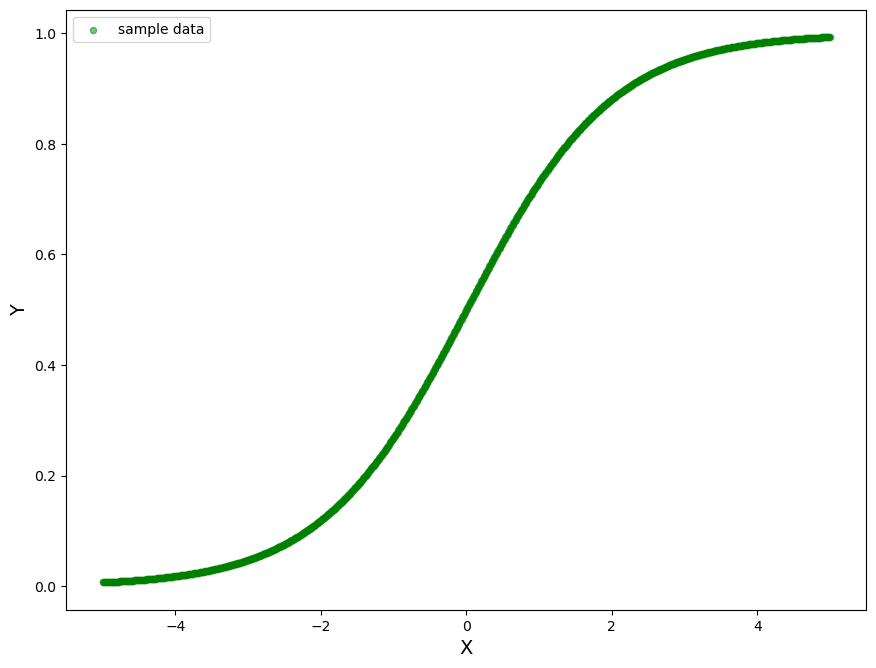

In [242]:
# Helper code to visualize the data 
plt.figure(figsize=(4,6))
plt.scatter(X_data, y_data,color='g' ,s = 20, alpha = 0.5, label='sample data')

plt.xlabel('X',fontsize=14); 
plt.ylabel('Y',fontsize=14)
plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.0, wspace=0.2, hspace=0.2)
plt.legend()
plt.show()

In [243]:
# Convert the predictor and response variables to tensor data
x = tf.convert_to_tensor(X_data)
x = tf.reshape(x,(-1,1))
y = tf.convert_to_tensor(y_data)
y = tf.reshape(y, (-1, 1))


In [244]:
# Function to define the neural network model
# The network has 2 hidden nodes and one output node
# We use sin activation for this exercise
# The network has a total of 5 parameters - 4 weights and one bias for the output

def basic_nn(w0,w1,b1,x=x):
    h1 = tf.matmul(x,w0)
    # Multiplies matrix a by matrix b, producing a * b
    a1 = tf.math.sin(h1)
    h2 = tf.matmul(a1,w1) + b1
    y = tf.math.sin(h2)
    return y


In [245]:
# Define 3 empty lists to store the accepted network parameters

# The weights0_list will contain 2 weights that connects the input
# to the hidden layer
weights0_list = []

# The weights1_list will contain 2 weights that connects the hidden
# nodes to the output
weights1_list = []

# The bias_list will hold the bias added to the output of the hidden nodes
bias_list = []

In [246]:
# Initialize the input to hidden weights randomly from a normal distribution 
# with mean=(1,1) and standard deviation=(1,1)
# Reshape the values to shape (1,2)
weights0 = tf.reshape(np.random.normal(loc=(-0.4,12),scale=(0.1,0.1), size=(1,2)), shape = (1,2))
# you are sampling from two normal distributions simultaneously and independently
# sample some values from one distribution and other values from the other

# Initialize the hidden to output weights randomly from a normal distribution 
# with mean=(-0.4,12) and standard deviation=(0.1,0.1)
# Reshape the values to shape (2,1)
weights1 = tf.reshape(np.random.normal(loc=(0.6, 0),scale=(0.1,0.1)), shape=(2,1))

# Initialize the bias randomly from a normal distribution 
# with mean=1 and standard deviation=1
bias = np.random.normal(loc=2.5, scale=0.1)


In [247]:
x

<tf.Tensor: shape=(1000, 1), dtype=float64, numpy=
array([[-5.        ],
       [-4.98998999],
       [-4.97997998],
       [-4.96996997],
       [-4.95995996],
       [-4.94994995],
       [-4.93993994],
       [-4.92992993],
       [-4.91991992],
       [-4.90990991],
       [-4.8998999 ],
       [-4.88988989],
       [-4.87987988],
       [-4.86986987],
       [-4.85985986],
       [-4.84984985],
       [-4.83983984],
       [-4.82982983],
       [-4.81981982],
       [-4.80980981],
       [-4.7997998 ],
       [-4.78978979],
       [-4.77977978],
       [-4.76976977],
       [-4.75975976],
       [-4.74974975],
       [-4.73973974],
       [-4.72972973],
       [-4.71971972],
       [-4.70970971],
       [-4.6996997 ],
       [-4.68968969],
       [-4.67967968],
       [-4.66966967],
       [-4.65965966],
       [-4.64964965],
       [-4.63963964],
       [-4.62962963],
       [-4.61961962],
       [-4.60960961],
       [-4.5995996 ],
       [-4.58958959],
       [-4.57957958],
   

In [248]:
tf.matmul(x, weights0)

<tf.Tensor: shape=(1000, 2), dtype=float64, numpy=
array([[  2.09358403, -59.56265296],
       [  2.08939267, -59.44340841],
       [  2.08520131, -59.32416386],
       ...,
       [ -2.08520131,  59.32416386],
       [ -2.08939267,  59.44340841],
       [ -2.09358403,  59.56265296]])>

In [249]:
tf.matmul(tf.matmul(x, weights0), weights1)

<tf.Tensor: shape=(1000, 1), dtype=float64, numpy=
array([[ 4.44761631],
       [ 4.43871218],
       [ 4.42980804],
       [ 4.4209039 ],
       [ 4.41199977],
       [ 4.40309563],
       [ 4.39419149],
       [ 4.38528736],
       [ 4.37638322],
       [ 4.36747908],
       [ 4.35857495],
       [ 4.34967081],
       [ 4.34076667],
       [ 4.33186253],
       [ 4.3229584 ],
       [ 4.31405426],
       [ 4.30515012],
       [ 4.29624599],
       [ 4.28734185],
       [ 4.27843771],
       [ 4.26953358],
       [ 4.26062944],
       [ 4.2517253 ],
       [ 4.24282117],
       [ 4.23391703],
       [ 4.22501289],
       [ 4.21610876],
       [ 4.20720462],
       [ 4.19830048],
       [ 4.18939635],
       [ 4.18049221],
       [ 4.17158807],
       [ 4.16268394],
       [ 4.1537798 ],
       [ 4.14487566],
       [ 4.13597153],
       [ 4.12706739],
       [ 4.11816325],
       [ 4.10925912],
       [ 4.10035498],
       [ 4.09145084],
       [ 4.08254671],
       [ 4.07364257],
   

In [250]:
np.zeros(shape = (2,1))[1]

array([0.])

In [256]:
# Function to get the prior given the network parameters
# NOTE - All the computations are done in the log space so 
# that the numbers are managable.

def get_log_prior(weights0,weights1, bias):

    # Initialize a numpy array of zeros with shape 2,1
    prior_w0 = np.zeros(shape = (2,1))
    
    # Find the probability of the first weight given the normal PDF with mean =1 and std=1
    # Take the log of this value
    prior_w0[0] = np.log(norm.pdf(weights0[0][0],-0.4, 0.1))
    
    # Find the probability of the second weight given the normal PDF with mean =1 and std=1
    # Take the log of this value
    prior_w0[1] = np.log(norm.pdf(weights0[0][1], 12, 0.1))

    # Initialize a numpy array of zeros with shape 2,1
    prior_w1 = np.zeros(shape = (2,1)) 
    
    # Find the probability of the third weight given the normal PDF with mean =0.6 and std=0.1
    # Take the log of this value
    prior_w1[0] = np.log(norm.pdf(weights1[0][0], 0.6, 0.1))
    
    # Find the probability of the first weight given the normal PDF with mean =0 and std=0.1
    # Take the log of this value
    prior_w1[1] = np.log(norm.pdf(weights1[1][0], 0, 0.1))

    # Find the probability of the bias given the normal PDF with mean=2.5 and std=0.1
    # Take the log of this value
    prior_bias = np.log(norm.pdf(bias, 2.5, 0.1))
    
    # Compute the prior as the sum of the previously computed priors
    log_prior = prior_w0[0] + prior_w0[1] + prior_w1[0] + prior_w1[1] + prior_bias
  
    # Return the prior value
    return log_prior
    

In [257]:
# Get the prior of the initial network parameters by calling the get_log_prior function
log_prior = get_log_prior(weights0, weights1, bias)

# Get the network predictions by calling the basic_nn function
ypred = basic_nn(weights0, weights1, bias)

# Compute the -ve log likelihood  given the true y and predicted y
log_likelihood =  -np.log(np.sum(((y-ypred)**2)))

# Compute the posterior as the sum of the likelihood and prior
posterior = log_prior + log_likelihood

# Save the current posterior value as prev_posterior for comparision later
prev_posterior = posterior

# Append weights0 to the weights0_list
weights0_list.append(weights0)

# Append weights1 to the weights1_list
weights1_list.append(weights1)

# Append bias to the bias_list
bias_list.append(bias)


In [258]:
# Specify the number of sampling "epochs". Set it to atleast 10000
epochs = 30000

# Loop over the range of sampling "epochs"
for i in range(epochs):
    if i%5000==0:
        print("EPOCH: ",i)

    # Get the candidate input to hidden weights randomly from a normal distribution 
    # with mean as the last element added to weights0_list and standard deviation=(0.1,0.1)
    # Reshape the values to shape (1,2)
    weights0 = tf.reshape(np.random.normal(loc=weights0_list[-1],scale=(0.1, 0.1)), shape=(1,2))

    # Get the candidate hidden to output weights randomly from a normal distribution 
    # with mean as the last element added to weights1_list and standard deviation=1
    # Reshape the values to shape (2,1)
    weights1 = tf.reshape(np.random.normal(loc = weights1_list[-1], scale = 0.1), shape=(2,1))

    # Get the candidate bias randomly from a normal distribution 
    # with mean as the last element added to bias_list and standard deviation=1
    bias = np.random.normal(loc = bias_list[-1], scale = 1)

    # Get the prior values for the candidate values by calling the get_log_prior function
    log_prior = get_log_prior(weights0, weights1, bias)

    # Get the network predictions by calling the basic_nn function with the candidate values
    ypred = basic_nn(weights0, weights1, bias)

    # Compute P(data|w) i.e. the log-likelihood given the true y and predicted y
    log_likelihood = -np.log(np.sum((y - ypred)**2))

    # To compute the posterior given the likelihood and prior
    # The posterior is the sum of the likelihood and prior
    posterior = log_likelihood + log_prior

    # Compute the the exponential of the ratio of the posterior given its previous value
    exp_ratio = np.exp(posterior - prev_posterior)
    # print(weights0, weights1, log_prior, log_likelihood, exp_ratio)

    # If the ratio is greater than or equal to 1 then accept the candidate values in this case
    if exp_ratio>=1:

        # Append the candidate values to the weights and bias list
        weights0_list.append(weights0)
        weights1_list.append(weights1)
        bias_list.append(bias)

        # Save the accepted posterior as the previous posterior
        prev_posterior = posterior

    # If the ratio is less than 1 then get a random value between 0 and 1
    else:
        coin = np.random.uniform(0.1)

        # Set a threshold value
        threshold = 0.98
        
        # Check if the random value is higher than the threshold
        # Append the candidate values to the list and update the previous posterior
        if coin > threshold:
            weights0_list.append(weights0)
            weights1_list.append(weights1)
            bias_list.append(bias)
            prev_posterior = posterior



EPOCH:  0
[-47.12862513]
[-8.46171325]
[-59.38150559]
[-23.51442903]
[1.22076954]
[-141.89747245]
[-12.25577714]
[-109.95573991]
[2.22284086]
[4.61388771]
[2.02892037]
[-83.28360754]
[-34.82662046]
[6.83187659]
[-62.23471337]
[-42.910168]
[-298.38798371]
[-2.17583058]
[5.85002483]
[-3.12453927]
[-69.44057692]
[-22.05774738]
[5.87362512]
[-77.31679728]
[-4.94672636]
[-9.01563418]
[-4.19184776]
[5.74249606]
[-4.62538473]
[5.23522254]
[-1.41793755]
[-57.19790853]
[-57.23581285]
[3.99643923]
[4.60669735]
[-48.42661104]
[-20.14860907]
[-90.09841072]
[-23.23664055]
[-146.74143661]
[-237.71097455]
[-229.6280615]
[0.42302142]
[-9.59748709]
[-47.27827986]
[-0.04858611]
[-6.73470778]
[-27.16872307]
[-95.60324897]
[-106.17419183]
[-2.37198198]
[-32.33969099]
[-64.49896369]
[-2.81400713]
[-30.41397911]
[-7.95016912]
[-36.97438777]
[-75.4004877]
[-46.71886771]
[-18.2532334]
[0.33010643]
[-3.70102301]
[-1.10818714]
[-140.041882]
[-120.63713641]
[-15.12534553]
[-60.29061578]
[-6.72312211]
[-18.239717

/tmp/ipykernel_86350/581397488.py:31: RuntimeWarning: divide by zero encountered in log
  prior_bias = np.log(norm.pdf(bias, 2.5, 0.1))


[-1.97453674]
[-19.07861605]
[-84.11374712]
[-200.4775177]
[-1.28735642]
[-13.94888366]
[-0.02562142]
[-4.18736958]
[-14.25685317]
[-0.89994643]
[-221.94711281]
[-65.02375614]
[-148.19748127]
[2.66662693]
[-0.81707191]
[-5.68979846]
[-4.42257326]
[-44.49335199]
[-67.50852304]
[-58.27883925]
[-180.35196268]
[5.30888709]
[-4.94408032]
[-77.7233285]
[-225.30637636]
[-21.35941375]
[3.0577157]
[-260.4806879]
[-74.80256764]
[-201.45465351]
[-3.37079667]
[3.49815452]
[4.65229744]
[4.66104932]
[-36.43412644]
[-28.7476397]
[-14.30537339]
[-20.83109229]
[-77.08968463]
[-382.54194057]
[-7.711503]
[0.0574818]
[0.25221842]
[-41.79415695]
[-16.38222954]
[-35.46047967]
[-13.0054539]
[-106.26015671]
[-102.63703642]
[-48.27414359]
[-80.72596102]
[-59.37181055]
[4.34674483]
[-10.94246946]
[-7.57818232]
[5.08115222]
[-0.64324755]
[3.113791]
[-190.7712932]
[-40.44405129]
[3.66191418]
[-9.13671102]
[0.9873839]
[-47.73951402]
[-170.98818166]
[-1.66811327]
[-45.93955816]
[-4.60733344]
[-106.36744484]
[-143.7

In [259]:
# The number of data points to consider after the beta list has been populated
burn_rate = int(len(bias_list)*0.2)

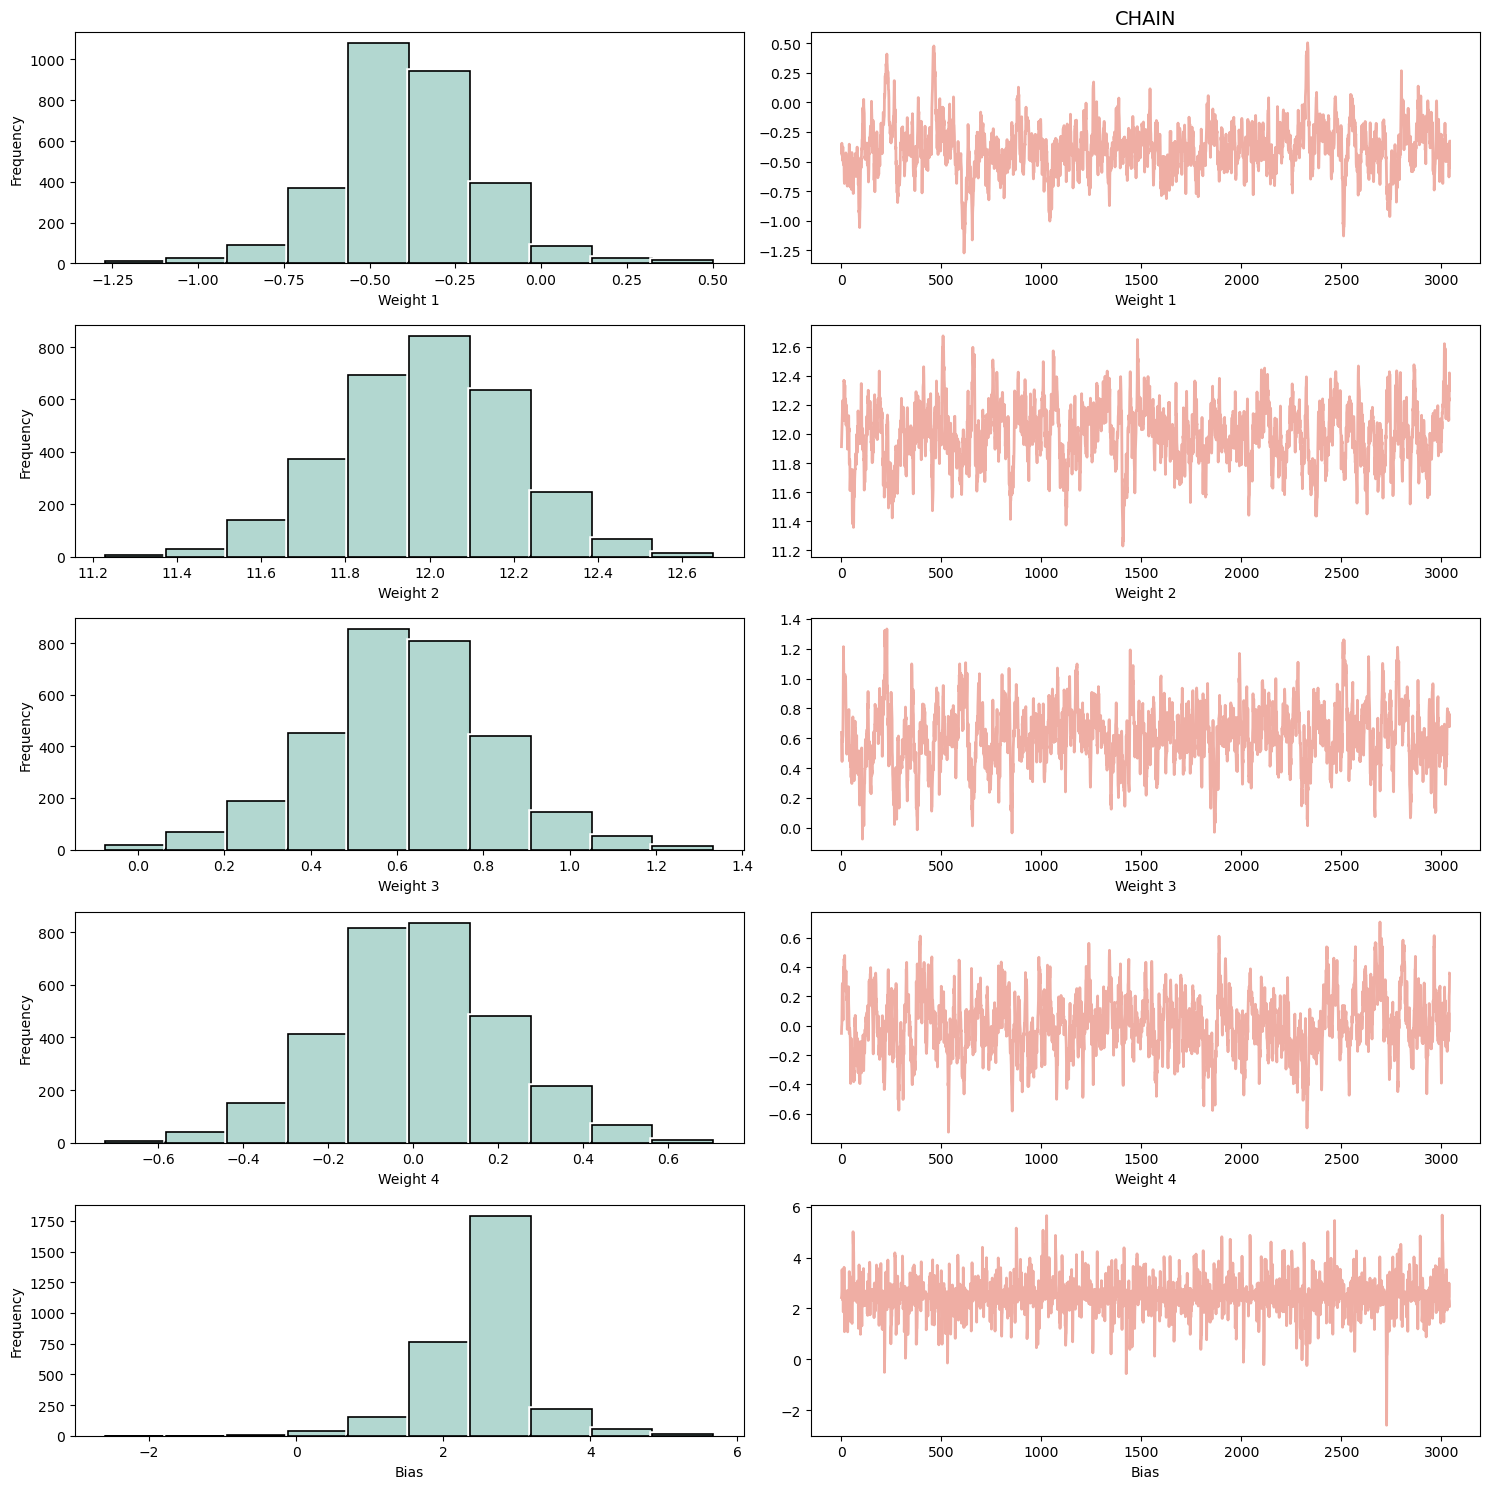

In [260]:
# Helper code to plot the distribution of network parameter
fig, ax = plt.subplots(5,2, figsize=(15,15))
col1 = "#B2D7D0"
col2 = "#EFAEA4"
fs = 12

with plt.xkcd(scale=0.01):
  ax[0][0].hist(np.array(weights0_list)[:,0,0], color=col1,linewidth=1.2,edgecolor='black')
  ax[0][0].set_xlabel("Weight 1")
  ax[0][0].set_ylabel("Frequency")


  ax[0][1].plot(np.array(weights0_list)[:,0,0], color=col2)
  ax[0][1].set_xlabel("Weight 1")
  ax[0][1].set_title("CHAIN", fontsize=14)

  ax[1][0].hist(np.array(weights0_list)[:,0,1], color=col1,linewidth=1.2,edgecolor='black')
  ax[1][0].set_xlabel("Weight 2")
  ax[1][0].set_ylabel("Frequency")

  ax[1][1].plot(np.array(weights0_list)[:,0,1], color=col2)
  ax[1][1].set_xlabel("Weight 2")


  ax[2][0].hist(np.array(weights1_list)[:,0,0], color=col1,linewidth=1.2,edgecolor='black')
  ax[2][0].set_xlabel("Weight 3")
  ax[2][0].set_ylabel("Frequency")

  ax[2][1].plot(np.array(weights1_list)[:,0,0], color=col2)
  ax[2][1].set_xlabel("Weight 3")


  ax[3][0].hist(np.array(weights1_list)[:,1,0], color=col1,linewidth=1.2,edgecolor='black')
  ax[3][0].set_xlabel("Weight 4")
  ax[3][0].set_ylabel("Frequency")

  ax[3][1].plot(np.array(weights1_list)[:,1,0], color=col2)
  ax[3][1].set_xlabel("Weight 4")

  ax[4][0].hist(np.array(bias_list), color=col1,linewidth=1.2,edgecolor='black')
  ax[4][0].set_xlabel("Bias")
  ax[4][0].set_ylabel("Frequency")

  ax[4][1].plot(np.array(bias_list), color=col2)
  ax[4][1].set_xlabel("Bias")


plt.tight_layout();

### ⏸ Go back and change the mean and standard deviation of weights1 while intializing to 0 and 1 respectively. What change do you notice in the result distribution?


In [261]:
### edTest(test_chow1) ###
# Type your answer in the space given below
answer1 = '___'

### ⏸ How is the distribution affected if mean and standard deviation of prior_w1[0] and prior_w1[0] are set to 0 and 1?

In [262]:
### edTest(test_chow2) ###
# Type your answer in the space given below
answer2 = '___'

### ⏸ For each network parameter, what affect does increase in scale of the prior from 0.1 to 10 expect to bring out, given you start from a prior that is very close to the true value?

#### A. With a wider range of possible values, the parameters would converge to the true values faster.
#### B. The prior is a constant, and hence does not affect the the parameter convergence.
#### C. The parameters will take longer to converge to their true values as the values bounce around more.
#### D. The parameter only depends on the mean and previous prior, not the standard deviation. Hence, there would be no affect with a change in the standard devidation. 

In [263]:
### edTest(test_chow3) ###
# Submit an answer choice as a string below (eg. if you choose option C, put 'C')
answer3 = 'C '

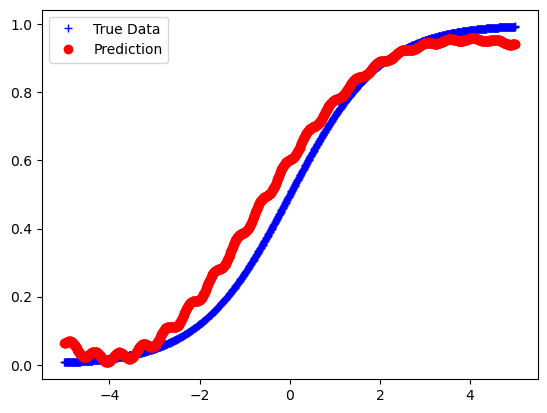

In [264]:
# Helper code to visualize the prediction by taking the mean of the network parameters
wl = np.array(weights0_list[burn_rate:])
wl2 = np.array(weights1_list[burn_rate:])
bi = np.array(bias_list[burn_rate:])

# Take the mean of the model parameters
w0 = np.mean(wl[:,0,:], axis=0).reshape(1,2)
w1 = np.mean(wl2[:,:,0], axis=0)
w1 = tf.reshape(tf.cast(w1, dtype='float32'), shape=(2,1))
# Casts a tensor to a new type. tf.cast(x, dtype, name=None)
b1 = np.mean(bi)

# Get the network prediction
h1 = tf.matmul(tf.cast(x, dtype='float32'), w0)
a1 = tf.math.sin(h1)
h2 = tf.matmul(a1,w1) + b1
y_pred = tf.math.sin(h2)

# Plot the true data and model prediction
plt.plot(X_data, y_data, 'b+', label="True Data")
plt.plot(X_data, y_pred, 'ro', label = "Prediction")
plt.legend()